# Fixed value of a different values of ρ

a = 2
<br>
ρ = 0, 0.1, 0.3, 0.5, 0.7, 0.9

In [1]:
from implementation.LDA import LDA
from implementation.QDA import QDA
from implementation.NB import NB
from implementation.dataset_generation import generate_dataset1, generate_dataset2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

### Scheme 1

In [2]:
results_scheme1 = {'LDA': [], 'QDA': [], 'NB': []}
a_value = 2

X_data, y_data = generate_dataset1(a=a_value)
for _ in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    lda = LDA()
    qda = QDA()
    nb = NB()

    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    y_pred_lda = lda.predict(X_test)
    y_pred_qda = qda.predict(X_test)
    y_pred_nb = nb.predict(X_test)

    results_scheme1['LDA'].append((accuracy_score(y_test, y_pred_lda), a_value))
    results_scheme1['QDA'].append((accuracy_score(y_test, y_pred_qda), a_value))
    results_scheme1['NB'].append((accuracy_score(y_test, y_pred_nb), a_value))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB for a=2 (scheme 1)')

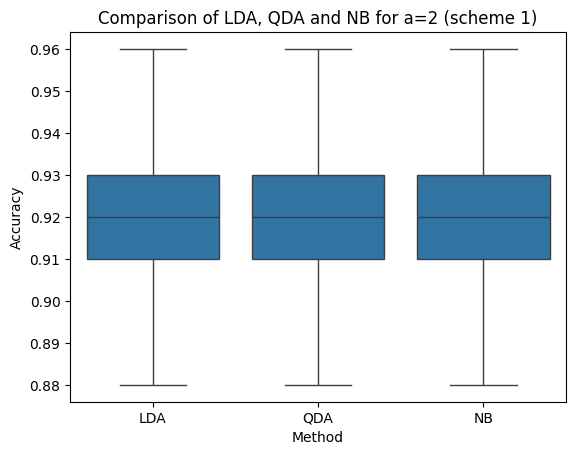

In [3]:
data_scheme1 = []
for method in results_scheme1:
    data_scheme1.extend([(method, acc, a) for acc, a in results_scheme1[method]])

df_scheme1 = pd.DataFrame(data_scheme1, columns=['Method', 'Accuracy', 'a'])

sns.boxplot(x='Method', y='Accuracy', data=df_scheme1, showfliers=False).set_title('Comparison of LDA, QDA and NB for a=2 (scheme 1)')

### scheme 2

In [7]:
results_scheme2 = {'LDA': [], 'QDA': [], 'NB': []}
a_value = 2
ro_values = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

for ro_value in ro_values:
    X_data, y_data = generate_dataset2(a=a_value, ro=ro_value)
    for _ in range(10000): 
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

        lda = LDA()
        qda = QDA()
        nb = NB()

        lda.fit(X_train, y_train)
        qda.fit(X_train, y_train)
        nb.fit(X_train, y_train)

        y_pred_lda = lda.predict(X_test)
        y_pred_qda = qda.predict(X_test)
        y_pred_nb = nb.predict(X_test)

        results_scheme2['LDA'].append((accuracy_score(y_test, y_pred_lda), ro_value))
        results_scheme2['QDA'].append((accuracy_score(y_test, y_pred_qda), ro_value))
        results_scheme2['NB'].append((accuracy_score(y_test, y_pred_nb), ro_value))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB for different ρ values (scheme 2)')

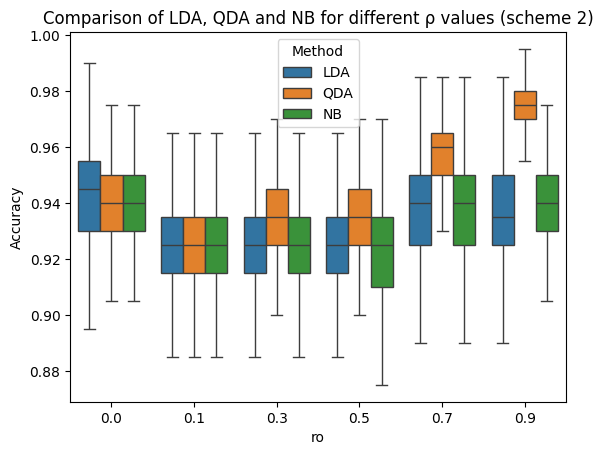

In [8]:
data_scheme2 = []
for method in results_scheme2:
    data_scheme2.extend([(method, acc, ro) for acc, ro in results_scheme2[method]])

df_scheme2 = pd.DataFrame(data_scheme2, columns=['Method', 'Accuracy', 'ro'])

sns.boxplot(x='ro', y='Accuracy', hue='Method', data=df_scheme2, showfliers=False).set_title('Comparison of LDA, QDA and NB for different ρ values (scheme 2)')